In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [29]:
cat_dir = r"D:\edge Downloads\dog vs cat\kagglecatsanddogs_3367a\PetImages\Cat"
dog_dir = r"D:\edge Downloads\dog vs cat\kagglecatsanddogs_3367a\PetImages\Dog"
cat_images = [os.path.join(cat_dir, img) for img in os.listdir(cat_dir)]
dog_images = [os.path.join(dog_dir, img) for img in os.listdir(dog_dir)]

all_images = cat_images + dog_images
labels = [0] * len(cat_images) + [1] * len(dog_images)

train_img,test_img,train_label,test_label = train_test_split(all_images,labels,test_size=0.2,random_state=232)

In [31]:
img_size = 128
batch_size = 64
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=r"D:\edge Downloads\dog vs cat\kagglecatsanddogs_3367a\PetImages",
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory=r"D:\edge Downloads\dog vs cat\kagglecatsanddogs_3367a\PetImages",
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 24959 images belonging to 2 classes.
Found 24959 images belonging to 2 classes.


In [33]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',
             metrics=['accuracy'])
histroy = model.fit(train_generator,epochs=5,validation_data=test_generator)

Epoch 1/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 369s 940ms/step - accuracy: 0.5834 - loss: 0.6689 - val_accuracy: 0.7366 - val_loss: 0.5200
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 333s 854ms/step - accuracy: 0.7347 - loss: 0.5317 - val_accuracy: 0.7888 - val_loss: 0.4514
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 343s 880ms/step - accuracy: 0.7803 - loss: 0.4629 - val_accuracy: 0.8163 - val_loss: 0.3981
Epoch 4/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 302s 775ms/step - accuracy: 0.8144 - loss: 0.4133 - val_accuracy: 0.8532 - val_loss: 0.3391
Epoch 5/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 302s 775ms/step - accuracy: 0.8314 - loss: 0.3827 - val_accuracy: 0.8572 - val_loss: 0.3220


In [34]:
model.save('cnn_binary.keras')

In [45]:
import tensorflow as tf
model=tf.keras.models.load_model('cnn_binary.keras')
model

<Sequential name=sequential_1, built=True>

In [36]:
loss,accuracy = model.evaluate(test_generator)
print(f"Test Accuracy : {accuracy*100:2f}%")

390/390 ━━━━━━━━━━━━━━━━━━━━ 75s 191ms/step - accuracy: 0.8607 - loss: 0.3205
Test Accuracy : 85.724586%


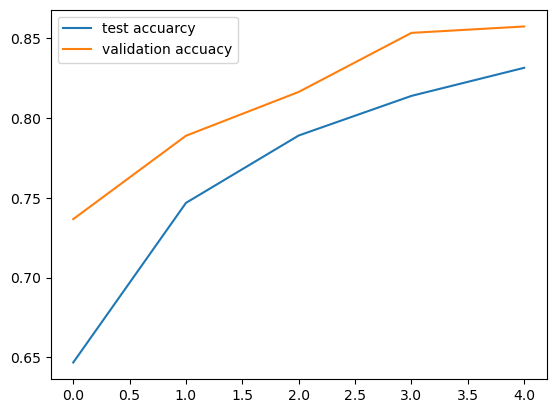

In [37]:
plt.plot(histroy.history['accuracy'], label = 'test accuarcy')
plt.plot(histroy.history['val_accuracy'],label = 'validation accuacy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


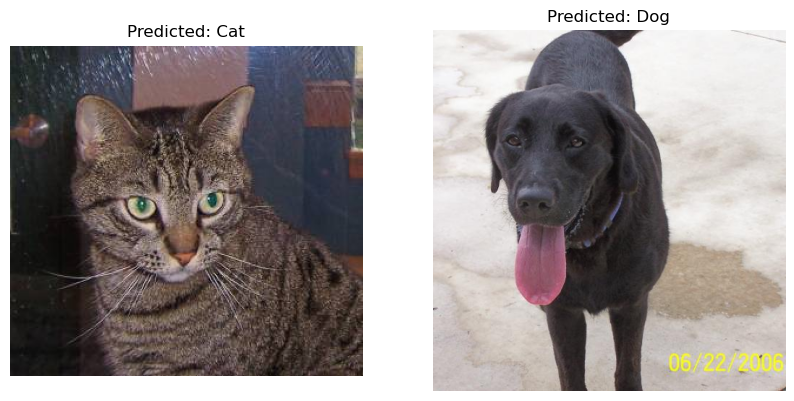

In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import cv2

def process_image(img_path, img_size=128):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_and_display(model, img_path):
    img_array = process_image(img_path)
    prediction = model.predict(img_array)
    label = 'Dog' if prediction > 0.5 else 'Cat'
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')

cat_image_path = r"D:\edge Downloads\dog vs cat\kagglecatsanddogs_3367a\PetImages\Cat\1.jpg"
dog_image_path = r"D:\edge Downloads\dog vs cat\kagglecatsanddogs_3367a\PetImages\Dog\258.jpg"

def display_side_by_side(cat_img_path, dog_img_path):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    predict_and_display(model, cat_img_path)

    plt.subplot(1, 2, 2)
    predict_and_display(model, dog_img_path)

    plt.show()
    
display_side_by_side(cat_image_path, dog_image_path)


In [ ]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

In [ ]:
import tensorflow_datasets as tfds
tfds.download.add_check_sums_delay = 3600  # Set a higher timeout in seconds
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

In [2]:
# Delete the existing folder
rm -rf C:\Users\Moulishwaran\tensorflow_datasets\cats_vs_dogs\4.0.1

SyntaxError: invalid syntax (1020087097.py, line 2)

In [3]:
import shutil
import os

# Path to the dataset directory
dataset_dir = r'C:\Users\Moulishwaran\tensorflow_datasets\cats_vs_dogs\4.0.1'

# Check if the directory exists and delete it
if os.path.exists(dataset_dir):
    shutil.rmtree(dataset_dir)
    print("Dataset cache cleared.")
else:
    print("Directory does not exist.")


Directory does not exist.
